In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spotify_dataset.csv')

In [9]:
ncols, nrows = df.shape
print(f'Dataset has {ncols} rows and {nrows} columns')

Dataset has 114000 rows and 20 columns


In [10]:
# Missing values in each row
missing_values_per_row = df.isnull().sum(axis=1)
count_per_missing_value = missing_values_per_row.value_counts().sort_index()

# Print the results
for missing, rows in count_per_missing_value.items():
    print(f'{rows} row(s) have {missing} missing values')

total_rows_with_missing_values = (df.isnull().any(axis=1)).sum()
print(f'Total number of rows with missing values: {total_rows_with_missing_values}')

113999 row(s) have 0 missing values
1 row(s) have 3 missing values
Total number of rows with missing values: 1


In [14]:
numerical_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]
numerical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   danceability      114000 non-null  float64
 3   energy            114000 non-null  float64
 4   key               114000 non-null  int64  
 5   loudness          114000 non-null  float64
 6   mode              114000 non-null  int64  
 7   speechiness       114000 non-null  float64
 8   acousticness      114000 non-null  float64
 9   instrumentalness  114000 non-null  float64
 10  liveness          114000 non-null  float64
 11  valence           114000 non-null  float64
 12  tempo             114000 non-null  float64
 13  time_signature    114000 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 12.2 MB


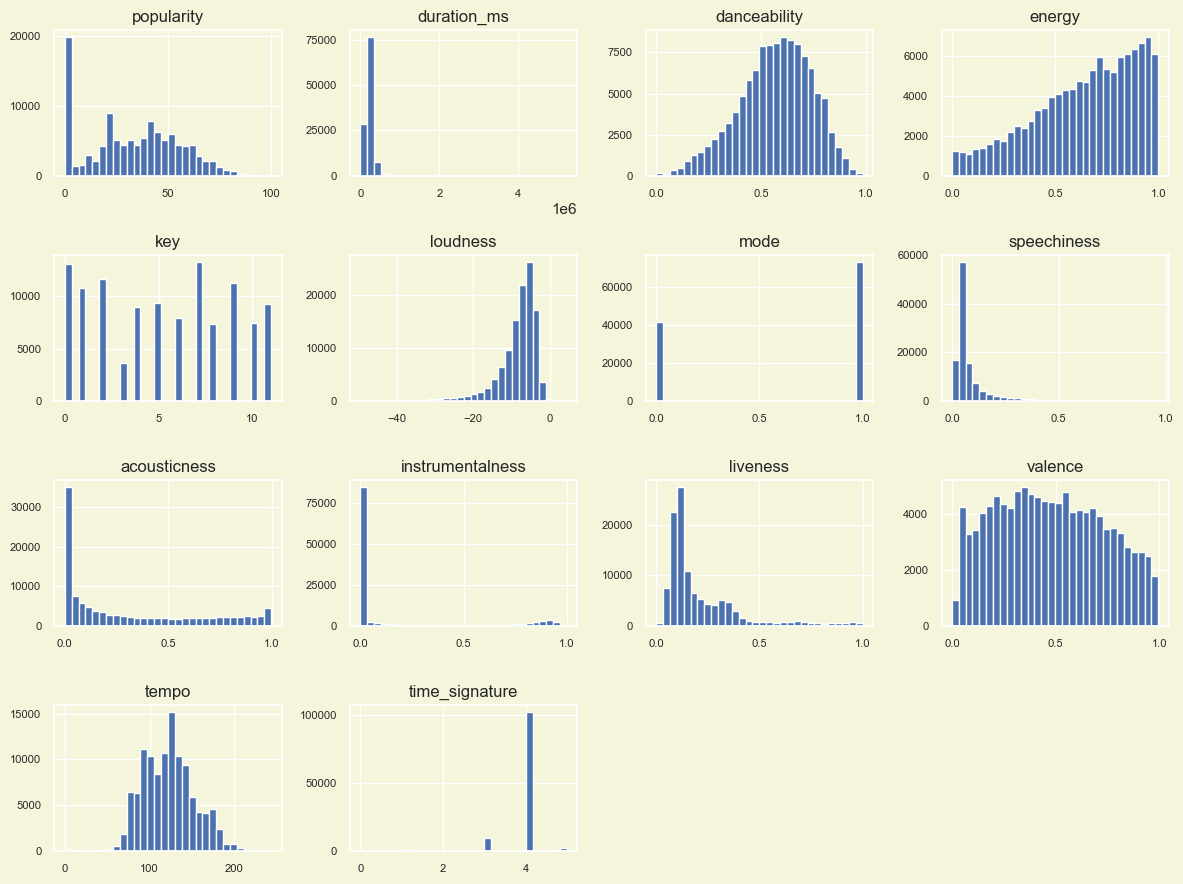

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#f5f5dc","figure.facecolor":"#f5f5dc"})
numerical_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

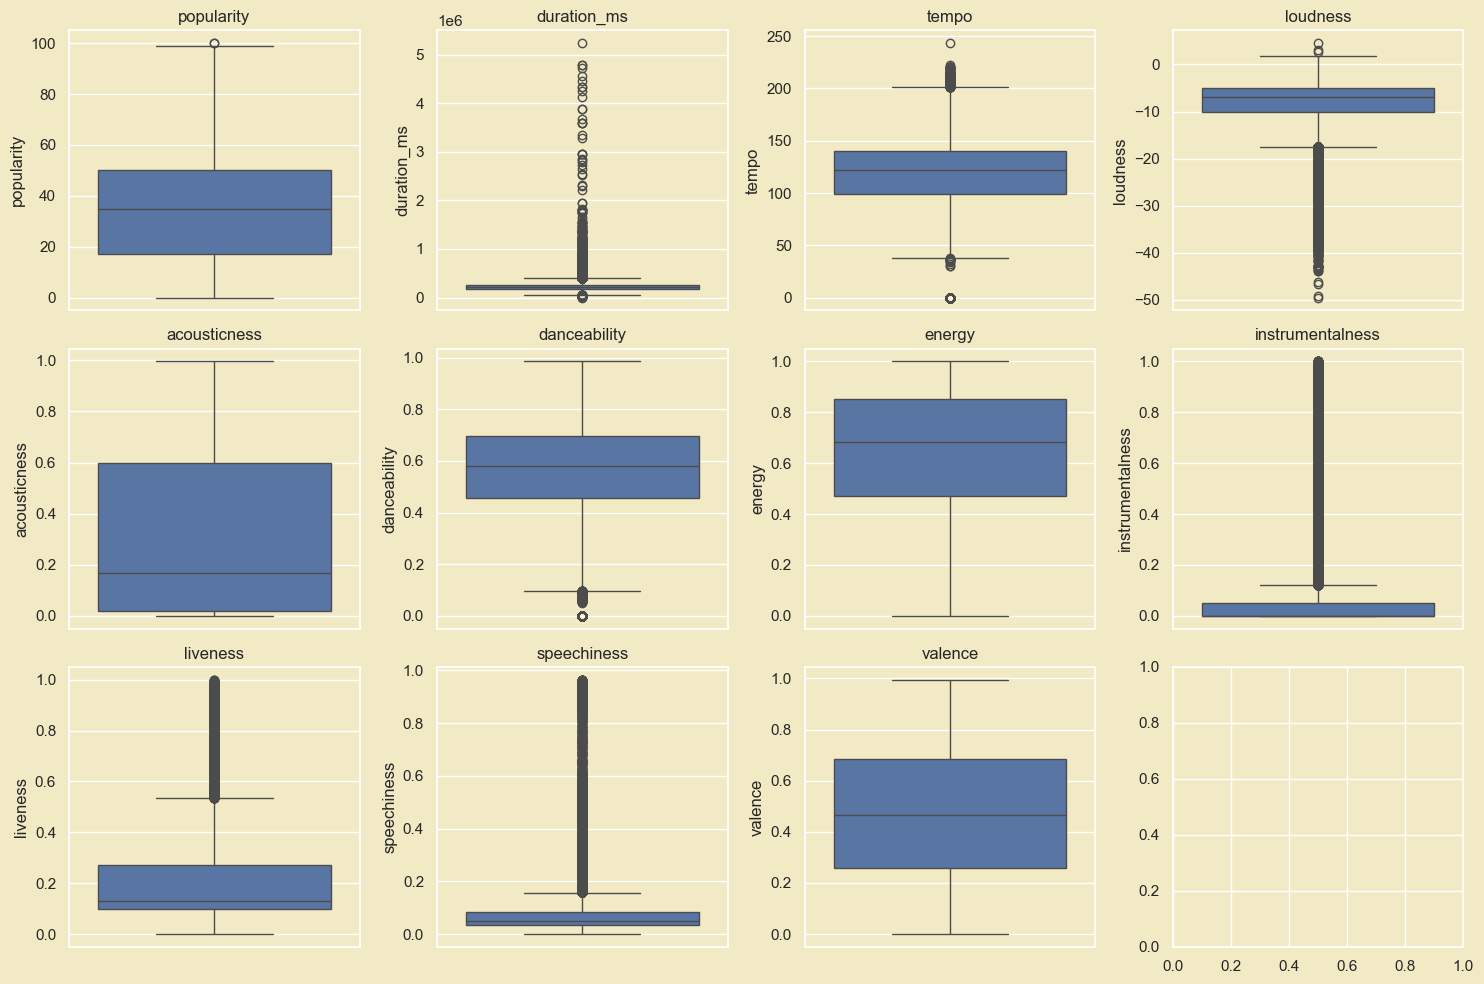

In [22]:
# boxplot for numerical columns to check for outliers
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
columns = ['popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=numerical_cols, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

In [21]:
categorical_cols = df[df.columns[(df.dtypes == 'object') | (df.dtypes == 'bool')]]
categorical_cols.info

<bound method DataFrame.info of                       track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (

/var/folders/s6/dkyrxyvs7sdcn4k3j2fb3pfh0000gn/T/ipykernel_35412/1114676022.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='track_genre', data=top_10_genres, palette='viridis', hue=None)


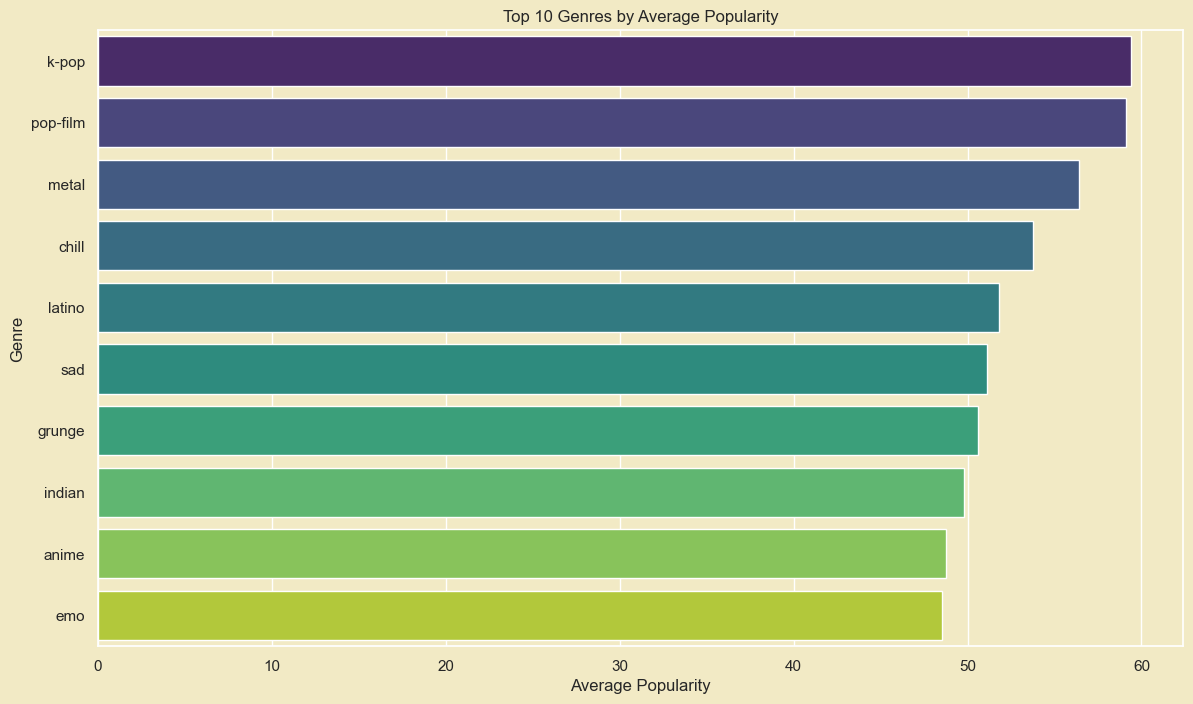

In [25]:
# Group by genre and calculate the mean popularity
genre_popularity = df.groupby('track_genre')['popularity'].mean().reset_index()

# Sort the data by popularity in descending order
genre_popularity = genre_popularity.sort_values(by='popularity', ascending=False)

# Select the top 10 genres
top_10_genres = genre_popularity.head(10)

# Create the bar plot
plt.figure(figsize=(14, 8))  # Adjust size as needed
sns.barplot(x='popularity', y='track_genre', data=top_10_genres, palette='viridis', hue=None)

# Add title and labels
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()


In [13]:
# Group by genre and calculate the mean popularity
genre_popularity = df.groupby('track_genre')['popularity'].mean()

# Find the most popular genre
most_popular_genre = genre_popularity.idxmax()
most_popular_genre_popularity = genre_popularity.max()

print(f"The most popular genre is '{most_popular_genre}' with an average popularity of {most_popular_genre_popularity:.2f}.")


The most popular genre is 'pop-film' with an average popularity of 59.28.


In [23]:
# Data Preprocessing
df = df.dropna()
df = df.drop(['time_signature', 'key'], axis=1)
df.drop_duplicates(subset=['track_id'], inplace=True)

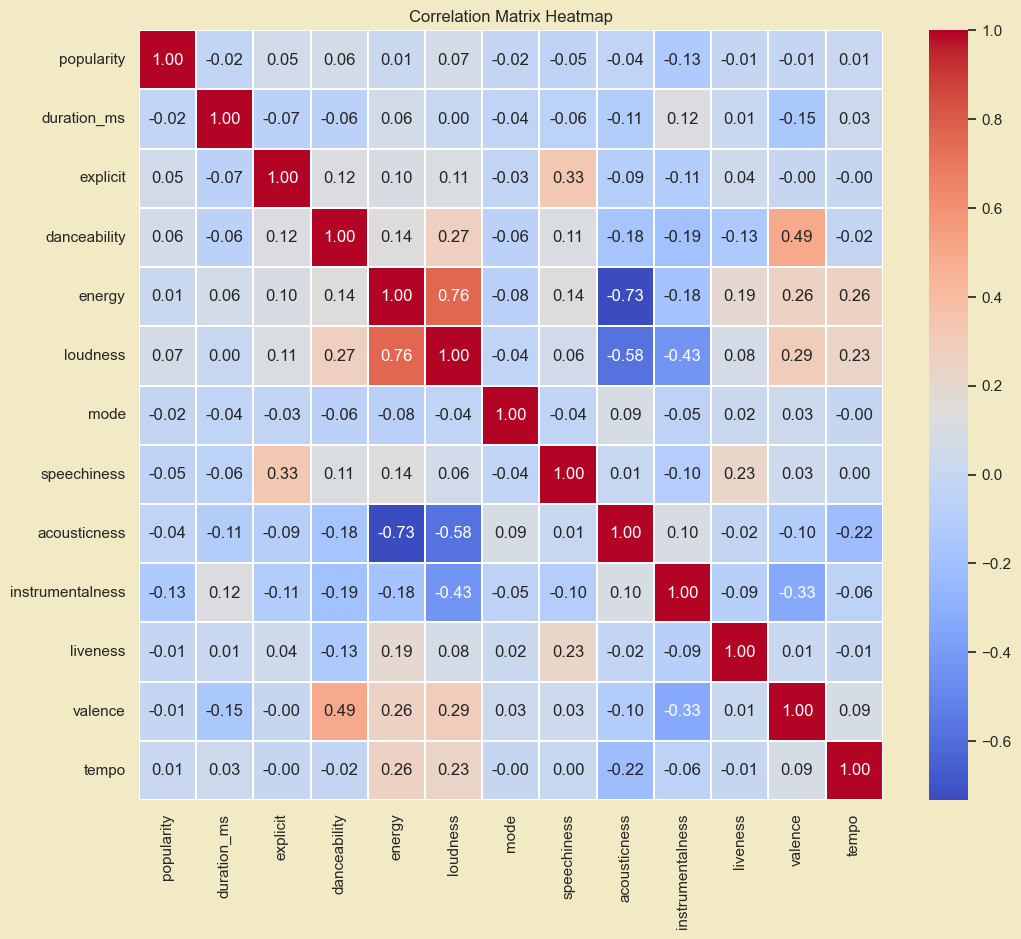

In [24]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.25)

# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()